# Visualize

# 1. Synthetic

In [51]:
disp ('executing gpml startup script...')
mydir = fileparts (mfilename ('fullpath'));                 % where am I located
addpath (mydir)
dirs = {'cov','doc','inf','lik','mean','prior','util'};           % core folders
for d = dirs, addpath (fullfile (mydir, d{1})), end
dirs = {{'util','minfunc'},{'util','minfunc','compiled'}};     % minfunc folders
for d = dirs, addpath (fullfile (mydir, d{1}{:})), end
% addpath([mydir,'/util/sparseinv'])
pkg load statistics

executing gpml startup script...


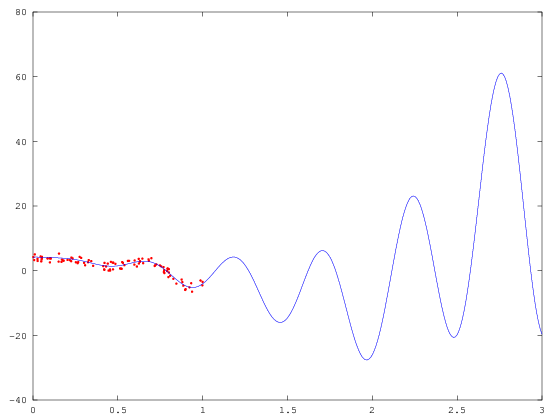

In [67]:
ns = 10;
x = rand(ns);
y = 5*x.^2.*sin(12*x)+(x.^3-0.5).*sin(3*x-0.5)+4*cos(2*x);  % 20 noisy training targets
noise =  3*(rand(ns)-0.5);
ny = y + noise;

hold on
plot(x, ny, 'r.')

xs = 0:0.01:3.0; 
ys = 5*xs.^2.*sin(12*xs)+(xs.^3-0.5).*sin(3*xs-0.5)+4*cos(2*xs);  % 20 noisy training targets
plot(xs, ys)

# 2. Energy data

## 2.1 Find q, NormY = N

In [35]:
dataset = 'energy_data';

partitionCriterions = {'kmeans'}; % 'random', 'kmeans', 'knkmeans'
criterions = {'TERBCM'}; %, 'TEGRBCM' 'TEGPoE'};
qs = 0.2:0.2:3.0;
ax = qs;
ysmse = zeros(1, length(ax)); ymsll = zeros(1, length(ax)); ynlpd = zeros(1, length(ax));

tmp = 1;

for i = 1:length(partitionCriterions)
    partitionCriterion = partitionCriterions{i};
    for j = 1:length(criterions)     
        criterion = criterions{j};
        for q = qs
            filename = sprintf('./res/%s_%s_%s_%6.2f.mat', dataset, partitionCriterion, criterion, q);
            s = load(filename);
            ysmse(tmp) = s.SMSE; ymsll(tmp) = s.MSLL; ynlpd(tmp) = s.NLPD;
            tmp += 1;
        endfor
    endfor
endfor

In [43]:
qq = 1.0421;

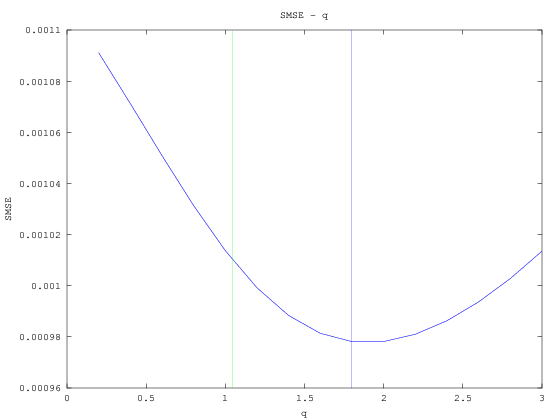

In [49]:
figure
miny = 0.00096; maxy = 0.0011;
[~, optq] = min(ysmse);
plot (ax, ysmse); 
line ([ax(optq),ax(optq)], [miny,maxy], "color", "blue");
line ([qq,qq], [miny,maxy], "color", "green");
ylim([miny, maxy]);
xlabel ("q"); 
ylabel ("SMSE"); 
title ("SMSE - q");

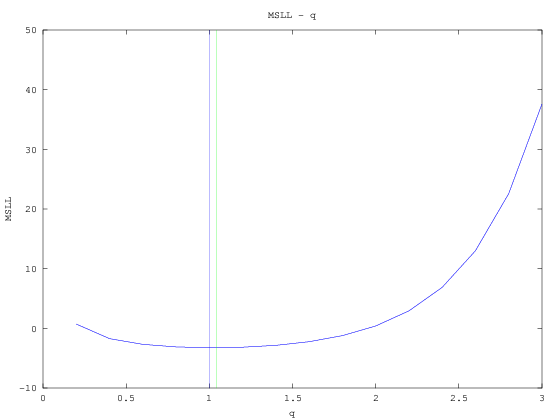

In [45]:
figure
miny = -10; maxy = 50;
[~, optq] = min(ymsll);
plot (ax, ymsll); 
line ([ax(optq),ax(optq)], [miny,maxy], "color", "blue");
line ([qq,qq], [miny,maxy], "color", "green");
ylim([miny, maxy]);
xlabel ("q"); 
ylabel ("MSLL"); 
title ("MSLL - q");

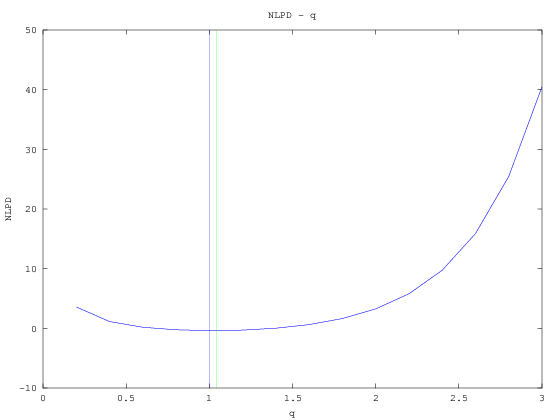

In [46]:
figure
miny = -10; maxy = 50;
[~, optq] = min(ynlpd);
plot (ax, ynlpd); 
line ([ax(optq),ax(optq)], [miny,maxy], "color", "blue");
line ([qq,qq], [miny,maxy], "color", "green");
ylim([miny, maxy]);
xlabel ("q"); 
ylabel ("NLPD"); 
title ("NLPD - q");

## 2.1 Find q, NormY = Y

In [1]:
dataset = 'energy_data';

partitionCriterions = {'kmeans'}; % 'random', 'kmeans', 'knkmeans'
criterions = {'TERBCM'}; %, 'TEGRBCM' 'TEGPoE'};
qs = 0.2:0.2:3.0;
ax = qs;
ysmse = zeros(1, length(ax)); ymsll = zeros(1, length(ax)); ynlpd = zeros(1, length(ax));

tmp = 1;

for i = 1:length(partitionCriterions)
    partitionCriterion = partitionCriterions{i};
    for j = 1:length(criterions)     
        criterion = criterions{j};
        for q = qs
            filename = sprintf('./res/%s_%s_%s_%6.2f.mat', dataset, partitionCriterion, criterion, q);
            s = load(filename);
            ysmse(tmp) = s.SMSE; ymsll(tmp) = s.MSLL; ynlpd(tmp) = s.NLPD;
            tmp += 1;
        endfor
    endfor
endfor

In [8]:
qq = 0.4929;

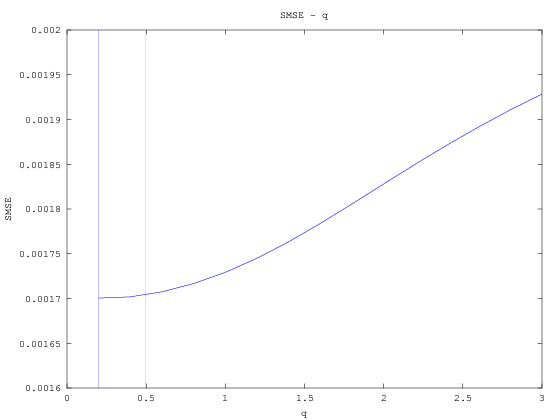

In [9]:
figure
miny = 0.0016; maxy = 0.0020;
[~, optq] = min(ysmse);
plot (ax, ysmse); 
line ([ax(optq),ax(optq)], [miny,maxy], "color", "blue");
line ([qq,qq], [miny,maxy], "color", "green");
ylim([miny, maxy]);
xlabel ("q"); 
ylabel ("SMSE"); 
title ("SMSE - q");

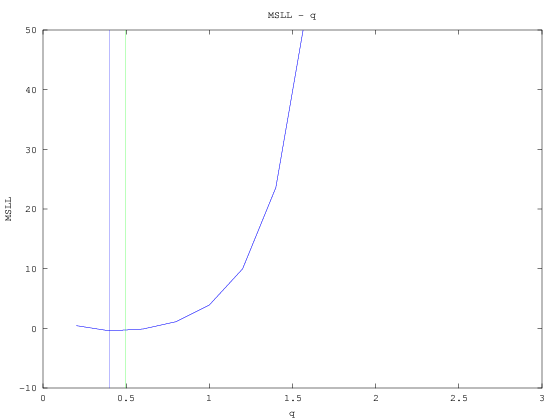

In [10]:
figure
miny = -10; maxy = 50;
[~, optq] = min(ymsll);
plot (ax, ymsll); 
line ([ax(optq),ax(optq)], [miny,maxy], "color", "blue");
line ([qq,qq], [miny,maxy], "color", "green");
ylim([miny, maxy]);
xlabel ("q"); 
ylabel ("MSLL"); 
title ("MSLL - q");

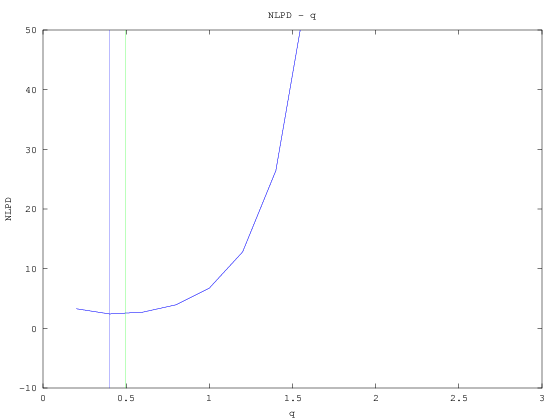

In [11]:
figure
miny = -10; maxy = 50;
[~, optq] = min(ynlpd);
plot (ax, ynlpd); 
line ([ax(optq),ax(optq)], [miny,maxy], "color", "blue");
line ([qq,qq], [miny,maxy], "color", "green");
ylim([miny, maxy]);
xlabel ("q"); 
ylabel ("NLPD"); 
title ("NLPD - q");

## 2.2 Multi-q
hist of 50 q

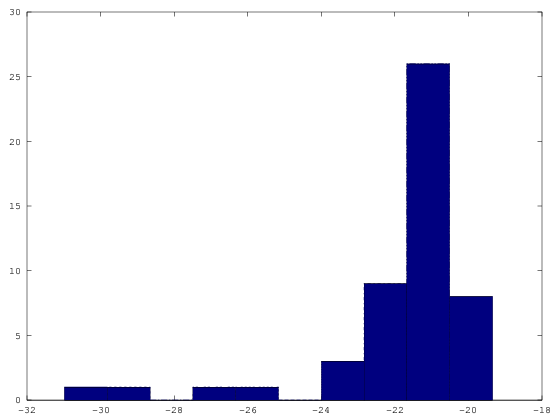

In [13]:
s = load('./res/energydataqs');
qs = s.qs;
hist (qs, 10);

# 3. Protein

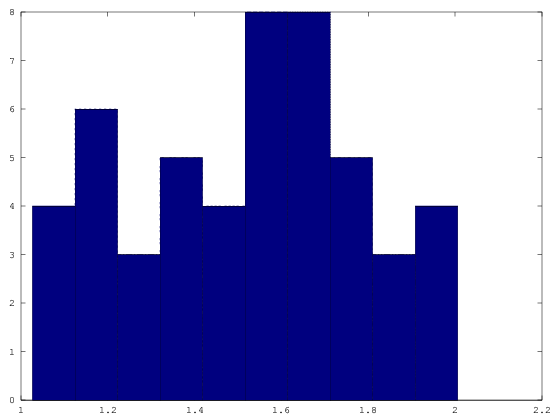

In [14]:
s = load('./res/proteinqs');
qs = s.qs;
hist (qs, 10);

# 4. Video

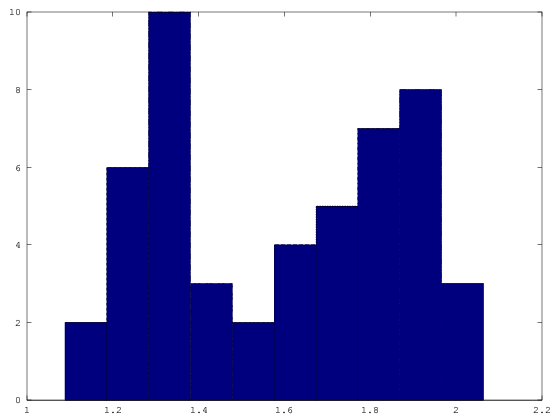

In [15]:
s = load('./res/videoqs');
qs = s.qs;
hist (qs, 10);

# Bar Plot

energy_smse =

   0.0017000   0.0017000   0.0017000   0.0033000
   0.0017000   0.0017000   0.0017000   0.0033000



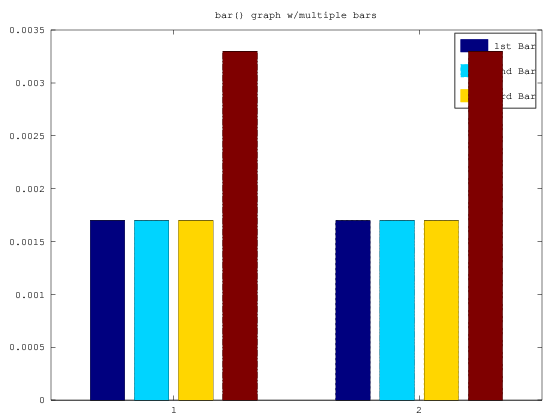

In [29]:
energy_smse = [0.0017, 0.0017, 0.0017, 0.0033;0.0017, 0.0017, 0.0017, 0.0033] %  shannon, tsallis, 1 q, 50 q 
 h = bar (energy_smse);
  legend ({"1st Bar", "2nd Bar", "3rd Bar"});
 title ("bar() graph w/multiple bars");

rand_2x3_data1 =

   0.341447   0.171220   0.284370
   0.039773   0.731725   0.779382



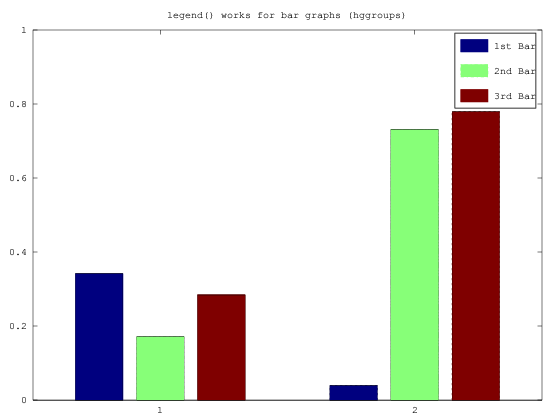

In [25]:
 rand_2x3_data1 = [0.341447, 0.171220, 0.284370; 0.039773, 0.731725, 0.779382]
 bar (rand_2x3_data1);
 ylim ([0 1.0]);
 title ("legend() works for bar graphs (hggroups)");
 legend ({"1st Bar", "2nd Bar", "3rd Bar"});